# Ellipsoidal nested rejection sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

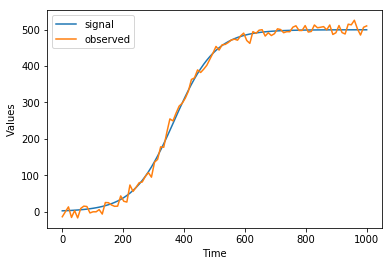

In [1]:
import os
os.chdir('C:\\Users\\bclamber\\Desktop\\AllPints\\pints4\\pints')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedEllipsoidSampler(log_likelihood, log_prior)

# Set number of iterations
sampler.set_iterations(8000)

# Set number of initial rejection samples (before ellipsoidal sampling begins)
sampler.set_rejection_samples(200)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

# Set gaps between updating ellipsoid
sampler.set_ellipsoid_update_gap(100)

# Set the number of active points
sampler.set_n_active_points(400)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested Ellipsoidal Rejection Sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z)
0     1       0:00.0 -inf        
0     2       0:00.0 -inf        
0     3       0:00.0 -inf        
0     4       0:00.0 -inf        
0     5       0:00.0 -inf        
0     21      0:00.0 -inf        
0     41      0:00.0 -inf        
0     61      0:00.0 -inf        
0     81      0:00.0 -inf        
0     101     0:00.0 -inf        
0     121     0:00.0 -inf        
0     141     0:00.0 -inf        
0     161     0:00.0 -inf        
0     181     0:00.0 -inf        
0     201     0:00.0 -inf        
0     221     0:00.0 -inf        
0     241     0:00.0 -inf        
0     261     0:00.0 -inf        
0     281     0:00.0 -inf        
0     301     0:00.0 -inf        
0     321     0:00.0 -inf        
0     341     0:00.0 -inf        
0     361     0:00.0 -inf        
0     381     0:00.0 -inf        
400

C:\Users\bclamber\Desktop\AllPints\pints4\pints\pints\_log_likelihoods.py:154: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1200  2911    0:00.9 -490.0067143
1220  2985    0:00.9 -461.3580615
1240  3061    0:00.9 -432.7528369
1260  3135    0:01.0 -413.2312853
1280  3203    0:01.0 -384.3066677
1300  3313    0:01.0 -363.2931125
1320  3403    0:01.1 -347.761327 
1340  3477    0:01.1 -326.4354192
1360  3553    0:01.1 -307.3296808
1380  3625    0:01.2 -286.7581027
1400  3725    0:01.2 -275.0757965
1420  3787    0:01.2 -259.1422133
1440  3863    0:01.3 -245.5256116
1460  3913    0:01.3 -233.6373014
1480  3995    0:01.3 -220.7342448
1500  4103    0:01.3 -210.1607267
1520  4169    0:01.4 -201.6749718
1540  4235    0:01.4 -192.413334 
1560  4291    0:01.4 -183.1829876
1580  4377    0:01.4 -174.5811132
1600  4479    0:01.5 -167.2819857
1620  4547    0:01.5 -159.8188589
1640  4617    0:01.5 -153.8410847
1660  4705    0:01.5 -147.0131882
1680  4785    0:01.5 -141.5543918
1700  4871    0:01.6 -136.6639804
1720  4935    0:01.6 -132.4736183
1740  5009    0:01.6 -128.0956453
1760  5073    0:01.7 -123.8358007
1780  5211    

## Plot posterior samples versus true parameter values (dashed lines)

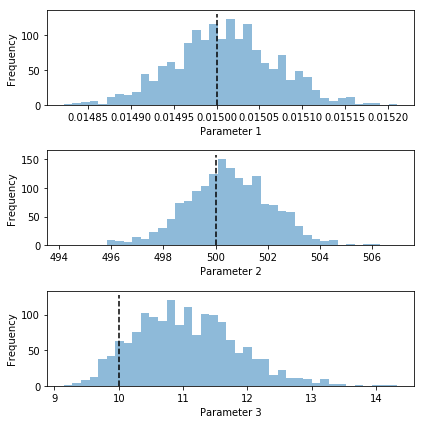

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

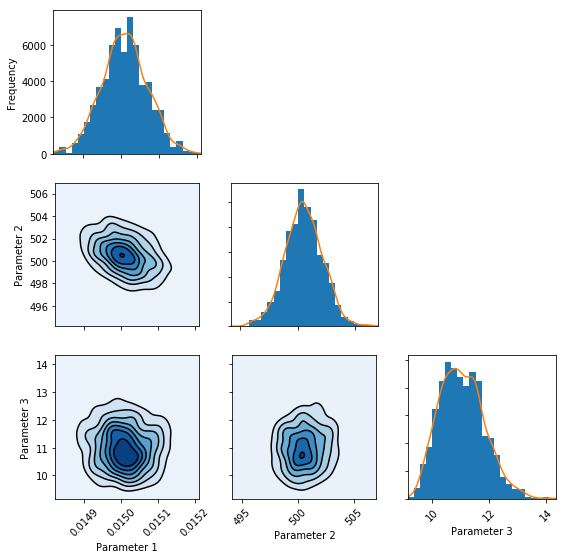

In [5]:
vTheta = samples[0]
pints.plot.pairwise(samples, kde=True)

plt.show()

## Plot posterior predictive simulations versus the observed data

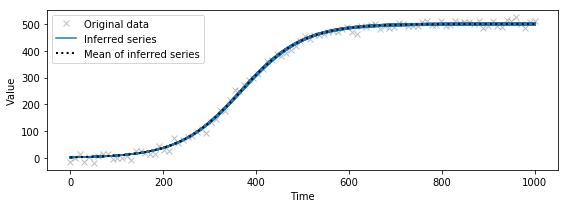

In [6]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [7]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -392.067045505 ± 0.0791523792593


## Effective sample size

In [8]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = nan


C:\Users\bclamber\Desktop\AllPints\pints4\pints\pints\_nested\__init__.py:474: RuntimeWarning: invalid value encountered in log
  - self._log_Z + np.log(self._w))


In [9]:
np.sum(sampler._vP * sampler._log_vP)

nan

In [10]:
vP = np.repeat(1/1000,1000)
log_vP = np.log(vP)
np.exp(-np.sum(vP * log_vP))

999.99999999999704

In [11]:
np.sum(sampler._vP)**2 / np.sum(sampler._vP**2)

1472.4666558972062

In [13]:
sampler._log_vP

array([             nan,  -2.45000124e+04,  -2.42362731e+04, ...,
        -7.16010893e+00,  -6.90603900e+00,  -7.43098829e+00])

In [14]:
sampler._w

array([ -4.98751561e-01,   2.49376040e-03,   2.48753379e-03, ...,
         7.53305967e-09,   7.53305967e-09,   7.53305967e-09])